# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


%matplotlib notebook


In [112]:
demo01 = pd.read_csv('demo01.csv')
demo01

,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,58.832877,3.106849,1,0,0,0,2.0,False,1,1,...,1,1,0,0,0,1,0,0,0,0
1,52.356164,8.358904,1,0,1,1,1.0,False,0,0,...,1,0,0,1,0,1,0,0,0,0
2,46.224658,2.106849,1,1,1,1,2.0,False,1,1,...,0,1,0,0,0,1,0,0,0,0
3,29.230137,3.021918,1,0,0,0,2.0,False,0,1,...,0,1,0,0,0,1,0,0,0,0
4,27.482192,4.024658,1,0,1,0,2.0,False,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,34.857534,3.101370,1,1,1,0,1.0,True,0,0,...,1,0,0,1,0,1,0,0,0,0
6766,54.109589,9.884932,1,0,0,0,2.0,True,0,0,...,1,0,0,0,0,1,0,0,0,0
6767,43.389041,7.380822,1,1,1,0,2.0,True,0,0,...,1,1,0,0,0,1,0,0,0,0
6768,30.005479,9.800000,1,1,0,0,2.0,True,1,1,...,1,1,0,0,0,1,0,0,0,0


In [113]:
y = demo01.mau

In [114]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
6765     True
6766     True
6767     True
6768     True
6769     True
Name: mau, Length: 6770, dtype: bool

In [115]:
X = demo01.drop('mau', axis = 1)

In [116]:
X

,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,58.832877,3.106849,1,0,0,0,2.0,1,1,1,...,1,1,0,0,0,1,0,0,0,0
1,52.356164,8.358904,1,0,1,1,1.0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
2,46.224658,2.106849,1,1,1,1,2.0,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,29.230137,3.021918,1,0,0,0,2.0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,27.482192,4.024658,1,0,1,0,2.0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,34.857534,3.101370,1,1,1,0,1.0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
6766,54.109589,9.884932,1,0,0,0,2.0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
6767,43.389041,7.380822,1,1,1,0,2.0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
6768,30.005479,9.800000,1,1,0,0,2.0,1,1,1,...,1,1,0,0,0,1,0,0,0,0


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [118]:
clf = DecisionTreeClassifier(random_state= 100)

In [119]:
clf = clf.fit(X_train,y_train)

In [129]:
predict_test = clf.predict(X_test)

In [130]:
predict = clf.predict(X_train)

/home/fostrix/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


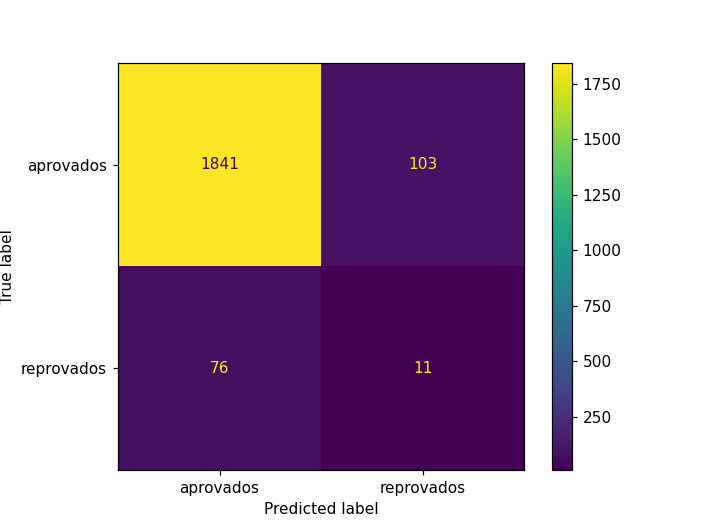

In [131]:
plot_confusion_matrix(clf, X_test, y_test, display_labels = ['aprovados', 'reprovados']);

/home/fostrix/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


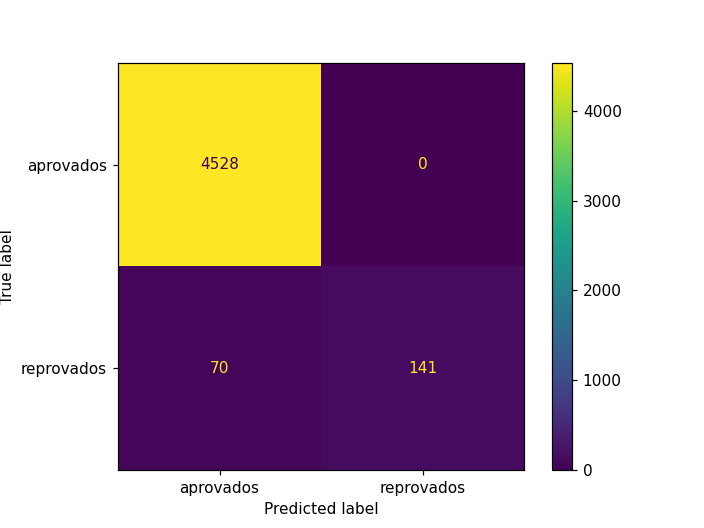

In [132]:
plot_confusion_matrix(clf, X_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [133]:
accuracy_score(y_test, predict_test)


0.9118660758247169

In [135]:
accuracy_score(y_train, predict)


0.9852289512555391

In [126]:
(1841+11)/(1841+11+103+76)

0.9118660758247169

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [152]:
clf_r = DecisionTreeClassifier(F, random_state = 123)
clf_r = clf_r.fit(X_train, y_train)
predict = clf_r.predict(X_test)
accuracy_score(y_test,predict)

0.9537173806006893

/home/fostrix/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


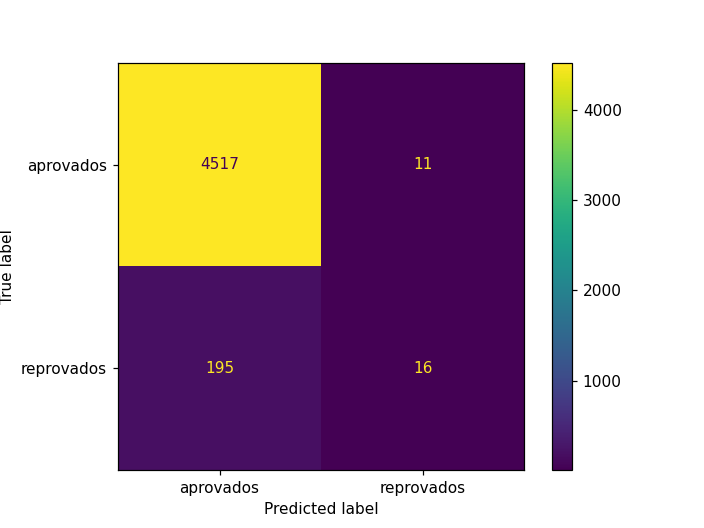

In [153]:
plot_confusion_matrix(clf, X_train, y_train, display_labels = ['aprovados', 'reprovados']);

<IPython.core.display.Javascript object>


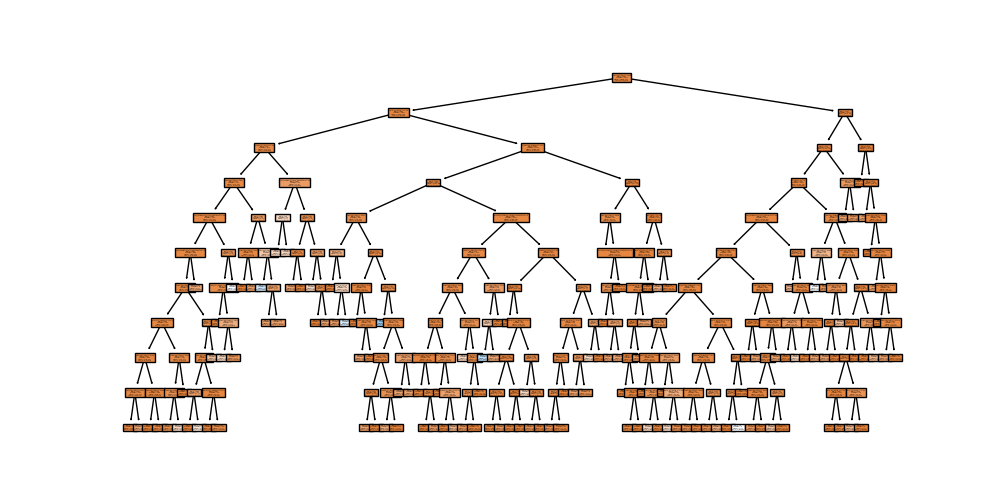

In [157]:
plt.figure(figsize = [10,5])
plot_tree(clf_r,
         filled=True,
         class_names = ['aprovados', 'reprovados'],
         feature_names = X_train.columns);